In [63]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns   
import warnings 
warnings.filterwarnings('ignore')


In [64]:
airline_df=pd.read_excel('D:\ML\Referral Predictor\data_airline_reviews.xlsx') 
airline_df.head(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [65]:
airline_df.shape

(131895, 17)

In [66]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [67]:
##Number of duplicated values 
airline_df.duplicated().value_counts()

True     70711
False    61184
Name: count, dtype: int64

In [68]:
##Getting the duplicated values 
airline_df[airline_df.duplicated()]

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
airline_df.drop_duplicates(inplace=True)

In [70]:
airline_df.duplicated().sum()

0

MISSING VALUES/NULL VALUES

In [71]:
airline_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

UNDERSTANDING THE DATASET

In [72]:
##GETTING COLUMNS OF THE DATASET 
col_names=airline_df.columns
col_names


Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

>airline:Name of the Airline 

>overall:Overall rating given to the trip between 1 to 10.  

>author:Author of the trip  

>review_date:Date of review 
 
>customer_review:Review of the Customer in text format
 
>aircraft:Type of Aircraft 
 
>traveller_type:Type of travel(Eg:Business,Leisure)
 
>cabin:Cabin of the flight 
 
>seat_comfort:Rated between 1-5 
 
>cabin_service:Rated between 1-5
 
>food_bev:Rated between 1-5 
 
>entertainment:Rated between 1-5 
 
>ground_service:Rated between 1-5 
 
>value_for_money:Rated between 1-5 
 
>recommended:Binary,target variable

In [73]:
##STATS OF EACH COLUMN 
airline_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [74]:
for i in col_names.tolist(): 
    print(f'Number of unique values in {i} is {airline_df[i].nunique()}')

Number of unique values in airline is 81
Number of unique values in overall is 10
Number of unique values in author is 44069
Number of unique values in review_date is 3015
Number of unique values in customer_review is 61172
Number of unique values in aircraft is 2088
Number of unique values in traveller_type is 4
Number of unique values in cabin is 4
Number of unique values in route is 24549
Number of unique values in date_flown is 63
Number of unique values in seat_comfort is 5
Number of unique values in cabin_service is 5
Number of unique values in food_bev is 5
Number of unique values in entertainment is 5
Number of unique values in ground_service is 5
Number of unique values in value_for_money is 5
Number of unique values in recommended is 2


EXPLORATORY DATA ANALYSIS

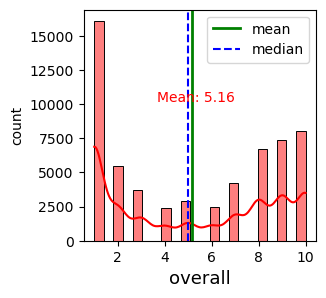

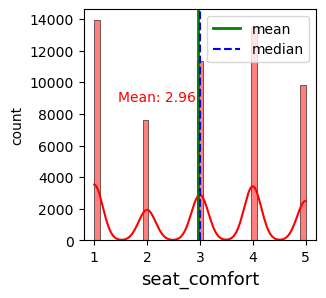

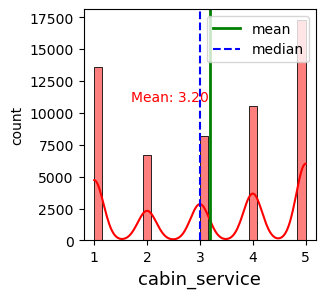

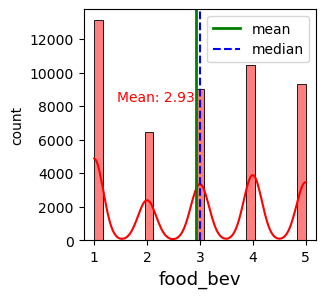

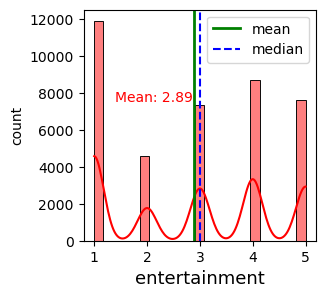

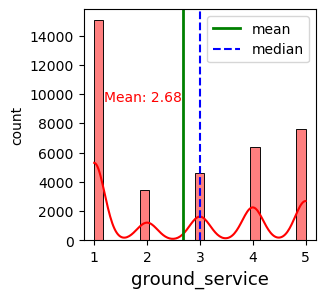

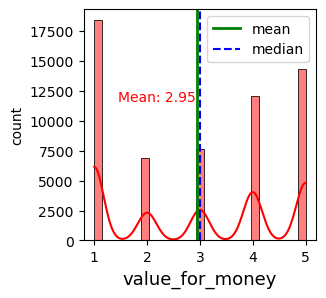

In [75]:
##visualization of distribution 
for col in ['overall','seat_comfort' ,'cabin_service','food_bev','entertainment','ground_service','value_for_money']: 
    plt.figure(figsize=(3,3)) 
    sns.histplot(airline_df[col],color='r',kde=True)  
    plt.xlabel(col,fontsize=13)  
    plt.ylabel('count') 
    ##Plot of mean and median 

    plt.axvline(airline_df[col].mean(),color='green',linewidth=2,label='mean') 
    plt.axvline(airline_df[col].median(),color='blue',linestyle='dashed',linewidth=1.5,label='median') 
    plt.text(airline_df[col].mean()-1.5,plt.ylim()[1] * 0.6,f"Mean: {airline_df[col].mean():.2f}",color='red')
    plt.legend(bbox_to_anchor=(1.0,1),loc='upper right')  
    plt.show() 

>Most of the  passengers give overall rating of  5.16 

>Most of the people give seat_comfort rating of 2.96 

>Most of the people give a cabin_service rating of 3.20

>Most of the people give food_bev service rating of  2.93 
 
>Most of the people give entertainment service rating of 2.89 
 
>Most of the people give ground service rating of 2.68 
 
>Most of the people give value_for_money rating of 2.95 


 

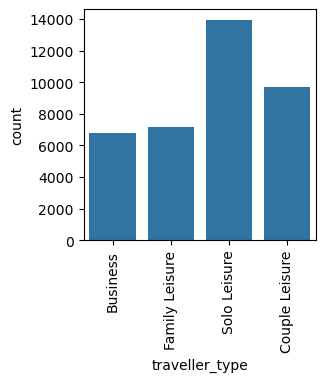

In [76]:
##Find the Traveller_type with more ratings 
   
airline_df.dropna(subset=['traveller_type'],inplace=True)  
plt.figure(figsize=(3,3)) 
sns.countplot(x=airline_df['traveller_type'],data=airline_df) 
plt.xticks(rotation=90) 
plt.show()



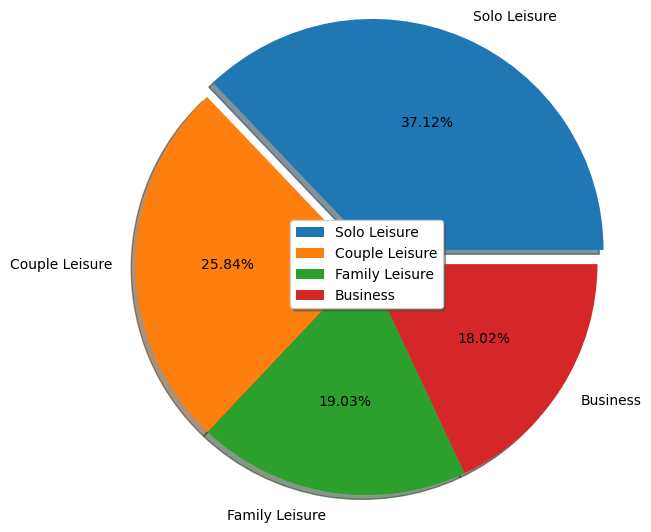

In [77]:
##Pie chart 
label_for_traveller=['Solo Leisure','Couple Leisure','Family Leisure','Business'] 
data1=airline_df['traveller_type'].value_counts().values 
explode=[0.1,0,0,0]
plt.figure(figsize=(5,5)) 
plt.pie(data1,labels=label_for_traveller,explode=explode,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize':10}) 
plt.legend(loc='center',shadow=True,fancybox=True) 
plt.show()

From the above graph we can see that Solo Leisure has the highest value counts,we can conclude that most people who travel by airline travel is solo with a percentage of 37.12 which is followed by Couple and Family Leisure

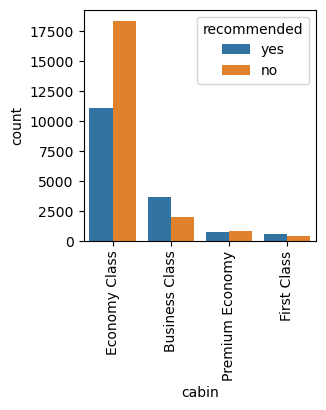

In [78]:
##Cabin Type with most recommendations 
airline_df.dropna(subset=['recommended'],inplace=True) 
plt.figure(figsize=(3,3)) 
sns.countplot(x=airline_df['cabin'],hue=airline_df['recommended'])  
plt.xticks(rotation=90) 
plt.show()


>From the plot above we can see that Economy Class has the highest counts with bad ratings

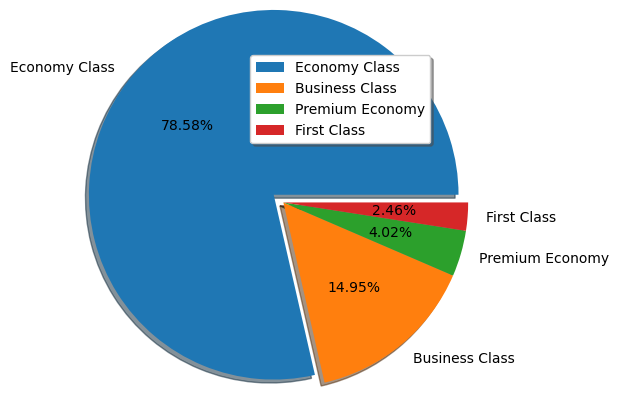

In [79]:
##PIE CHART 
label_for_cabin=airline_df['cabin'].dropna().unique()
data2=airline_df['cabin'].value_counts().values 
plt.figure(figsize=(4,4)) 
explode=[0.1,0,0,0] 
plt.axis=("equal") 
plt.pie(data2,labels=label_for_cabin,explode=explode,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize':10})  
plt.legend(loc='upper right',shadow=True,fancybox=True)  

plt.show()


>From the plot above we can conclude that most of the people around 76.71% choose Economy class to travel

[10715  9735  6100  5367  4568]


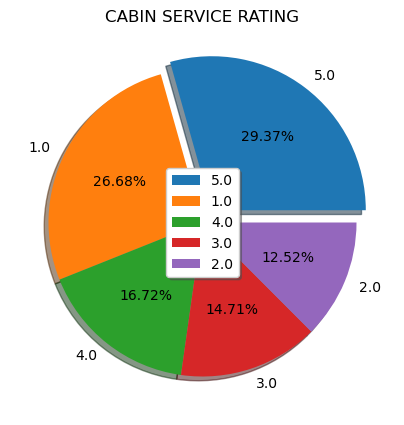

In [80]:
##Cabin Service ratings 
 
label_for_cabin_service=airline_df['cabin_service'].dropna().unique()
data3=airline_df['cabin_service'].value_counts().values  
print(data3)
plt.figure(figsize=(5,5))  
explode=[0.1,0,0,0,0]
plt.pie(data3,labels=label_for_cabin_service,explode=explode,shadow=True,autopct='%0.2f%%',textprops={'fontsize':10}) 
plt.legend(loc='center',shadow=True)  
plt.title("CABIN SERVICE RATING")
plt.show()

>Above plot shows that 24.15% of the passengers are not satisfied with cabin service 
 
>Approx 50% of the passengers are giving a rating of 4.0 and 5.0 this shows that cabin_service positively impacts the airline business

<Axes: xlabel='cabin'>

<Figure size 300x300 with 0 Axes>

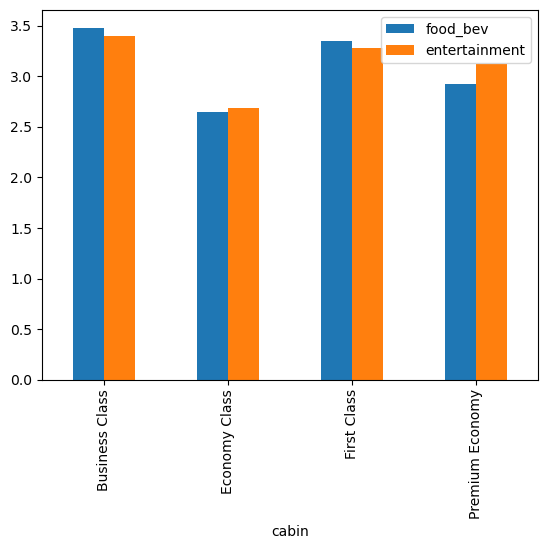

In [81]:
##Average ratings of Food_bev and entertainment in Economy class 
  
gp_by_cabin=airline_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index() 
plt.figure(figsize=(3,3)) 
gp_by_cabin.plot(x='cabin',y=["food_bev","entertainment"],kind="bar") 


>From the above plot we can see that the average rating of food_bev and entertainment is least for Economy Class

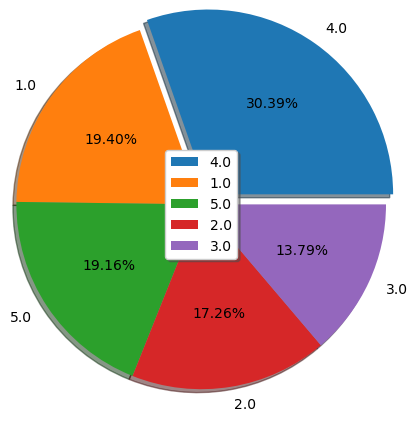

In [82]:
##Percentage of Food_bev rating for passengers 
    
label_for_food_bev=airline_df['food_bev'].dropna().unique() 
data4=airline_df['food_bev'].value_counts().values
plt.figure(figsize=(4,4))  
explode=[0.1,0,0,0,0]
plt.pie(data4,labels=label_for_food_bev,explode=explode,radius=1.5,shadow=True,autopct='%0.2f%%',textprops={'fontsize':10}) 
plt.legend(loc='center',shadow=True,fancybox=True) 
plt.show() 


> 21.41% of the passengers are satisfied with the food   
 
> More than 50% of the passengers are satisified with the food,from this we conclude that the overall rating of the airline in terms of food_bev is good,thereby positively impacts the airline business


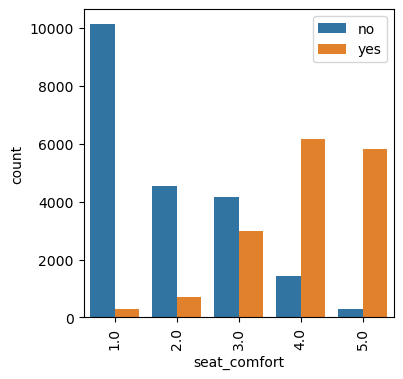

In [83]:
##Variation of Recommendation feature with Seat Feature 
   
airline_df.dropna(subset=['recommended'],inplace=True) 
plt.figure(figsize=(4,4)) 
sns.countplot(x=airline_df['seat_comfort'],hue=airline_df['recommended']) 
plt.xlabel('seat_comfort') 
plt.ylabel('count') 
plt.legend(loc='upper right')  
plt.xticks(rotation=90) 
plt.show()

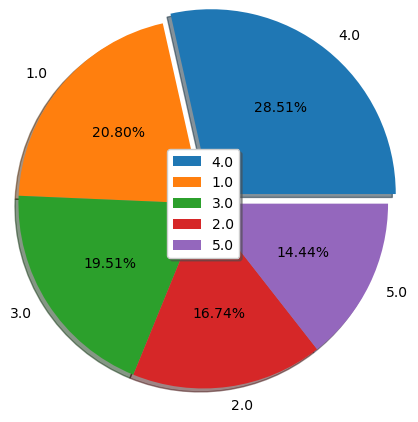

In [84]:
##PIE CHART 
label_for_seat_comfort=airline_df['seat_comfort'].dropna().unique() 
data5=airline_df['seat_comfort'].value_counts().values 
plt.figure(figsize=(4,4)) 
explode=[0.1,0,0,0,0] 
plt.pie(data5,labels=label_for_seat_comfort,explode=explode,radius=1.5,shadow=True,autopct='%0.2f%%',textprops={'fontsize':10}) 
plt.legend(loc='center',shadow=True,fancybox=True) 
plt.show()



>About 44% of the passengers are not satisfied as they gave a rating of 1.0 and 2.0,this shows that airline has to improve the seating 

 
>37% of the passengers gave a rating of 4.0 and 5.0,this shows that the overall rating is not that good.So we can say that seat_comfort negitively impacts the airline business 

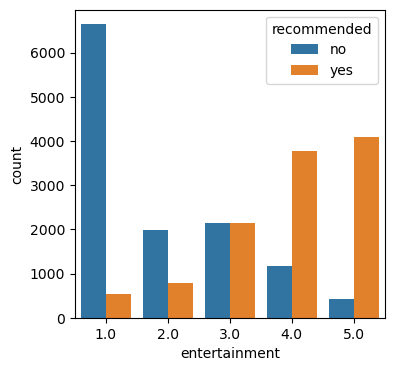

In [85]:
##Variation of Recommendation with entertainment 
  
airline_df.dropna(subset=['entertainment'],inplace=True) 
plt.figure(figsize=(4,4)) 
sns.countplot(x=airline_df['entertainment'],hue=airline_df['recommended'])  
plt.xlabel("entertainment")  
plt.ylabel('count') 
plt.show()


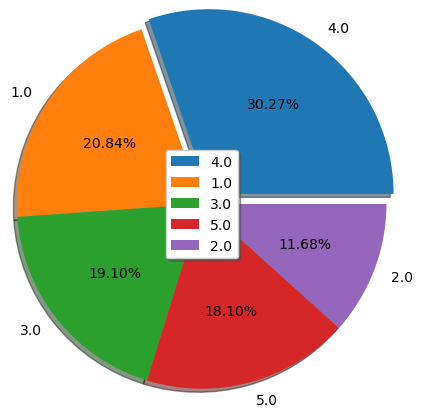

In [86]:
##PIE CHART  
 
label_for_entertainment=airline_df['entertainment'].dropna().unique()
data6=airline_df['entertainment'].value_counts().values 
plt.figure(figsize=(4,4)) 
explode=[0.1,0,0,0,0] 
plt.pie(data6,labels=label_for_entertainment,explode=explode,radius=1.5,shadow=True,autopct='%0.2f%%',textprops={'fontsize':10}) 
plt.legend(loc='center',shadow=True,fancybox=True) 
plt.show()



>About 31% of the passengers gave a rating of 1.0 and 2.0,the airline has to improve a little bit 
 
>About 48% of the passengers gave a rating of 4.0 and 5.0, this shows that most of the passengers are satisfied with the entertainment.This positively impacts the airline business

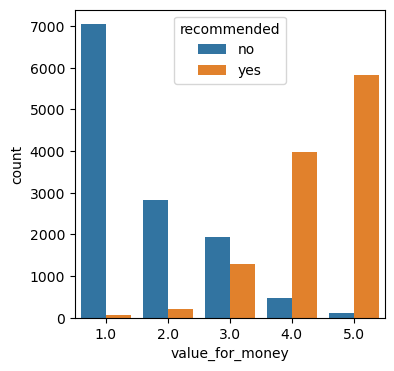

In [87]:
##Variation of Recommendation with value_for_money 
airline_df.dropna(subset=['value_for_money'],inplace=True) 
plt.figure(figsize=(4,4)) 
sns.countplot(x=airline_df['value_for_money'],hue=airline_df['recommended'])  
plt.xlabel("value_for_money")  
plt.ylabel('count') 
plt.show()


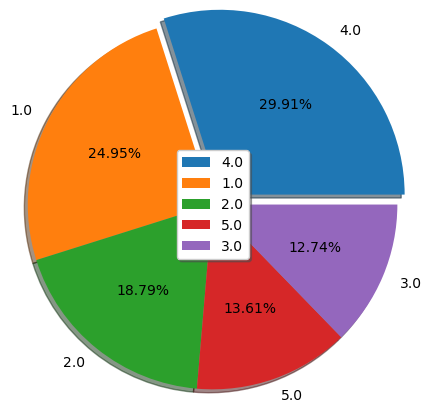

In [88]:
##PIE CHART 
 
label_for_value_for_money=airline_df['value_for_money'].dropna().unique()
data7=airline_df['value_for_money'].value_counts().values 
plt.figure(figsize=(4,4)) 
explode=[0.1,0,0,0,0] 
plt.pie(data7,labels=label_for_value_for_money,explode=explode,radius=1.5,shadow=True,autopct='%0.2f%%',textprops={'fontsize':10}) 
plt.legend(loc='center',shadow=True,fancybox=True) 
plt.show()


>About 42% of the passenegrs are not satisfied as they gave a rating of 1.0 and 2.0,this shows that the airline has to improve 
 
>About 42% of the passengers gave a rating of 4.0 and 5.0,therefore the overall rating is average.This negatively impacts the airline business

[6304 2991 2976 2610 2350 1691 1671 1080 1064  992]
[ 7.  2.  3. 10.  1.  6.  8.  5.  4.  9.]


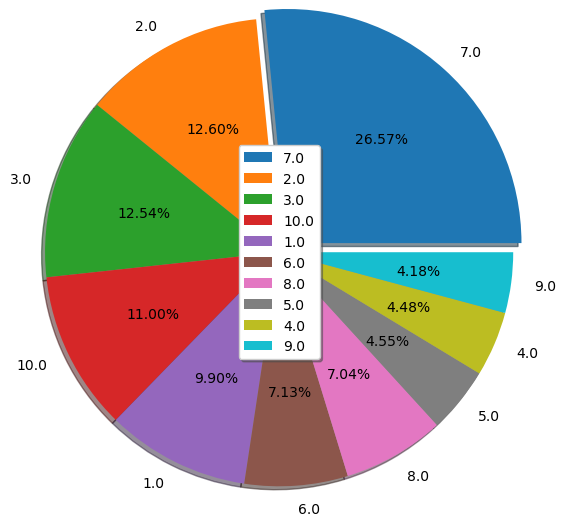

In [89]:
##Percentage of Overall Rating by Passengers
  
label_for_overall=airline_df['overall'].dropna().unique()
data8=airline_df['overall'].value_counts().values 
plt.figure(figsize=(4,4)) 
explode=[0.1,0,0,0,0,0,0,0,0,0] 
print(data8) 
print(label_for_overall)
plt.pie(data8,labels=label_for_overall,explode=explode,radius=1.9,shadow=True,autopct='%0.2f%%',textprops={'fontsize':10}) 
plt.legend(loc='center',shadow=True,fancybox=True) 
plt.show()



>About 48% of the passengers gave a rating >=7,this section of the passengers are satisfied with the airlines.This implies that these people think that the airline is providing good services  
 
>About 40% of the passengers gave a rating<=5,this this section of the passengers are not satisfied with the airlines.This implies that these people think that the airline is not providing good services,thereby indicating that the airline needs improvement
 

DATA CLEANING

In [90]:
airline_df=airline_df.dropna() 
airline_df


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no
17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no
29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131676,Ukraine International,6.0,A Dunduras,10th October 2015,Ukraine International it isn't for everyone. I...,Boeing 767,Solo Leisure,Economy Class,JFK to VNO via KBP,September 2015,2.0,4.0,2.0,1.0,4.0,5.0,yes
131680,Ukraine International,7.0,Filip Badziak,6th October 2015,"Warsaw to Kiev the plane was on time, Kiev air...",Boeing 767,Couple Leisure,Economy Class,WAW to BKK via KBP,January 2015,2.0,2.0,2.0,1.0,2.0,5.0,yes
131696,Ukraine International,1.0,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,Boeing,Family Leisure,Economy Class,New York to Lviv,July 2015,1.0,1.0,1.0,1.0,1.0,1.0,no
131702,Ukraine International,10.0,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,Boeing 737,Couple Leisure,Economy Class,KBP to RIX,July 2015,5.0,5.0,5.0,4.0,4.0,4.0,yes


In [91]:
airline_df=airline_df.drop(['author','customer_review','aircraft','route','date_flown','review_date'],axis=1)  
airline_df

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
15,Turkish Airlines,2.0,Solo Leisure,Economy Class,3.0,3.0,2.0,3.0,1.0,2.0,no
17,Turkish Airlines,6.0,Solo Leisure,Economy Class,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
29,Turkish Airlines,2.0,Solo Leisure,Economy Class,1.0,3.0,2.0,2.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...
131676,Ukraine International,6.0,Solo Leisure,Economy Class,2.0,4.0,2.0,1.0,4.0,5.0,yes
131680,Ukraine International,7.0,Couple Leisure,Economy Class,2.0,2.0,2.0,1.0,2.0,5.0,yes
131696,Ukraine International,1.0,Family Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
131702,Ukraine International,10.0,Couple Leisure,Economy Class,5.0,5.0,5.0,4.0,4.0,4.0,yes


Text(0.5, 1.0, 'CORRELATION MATRIX HEATMAP (NUMERIC VALUES ONLY)')

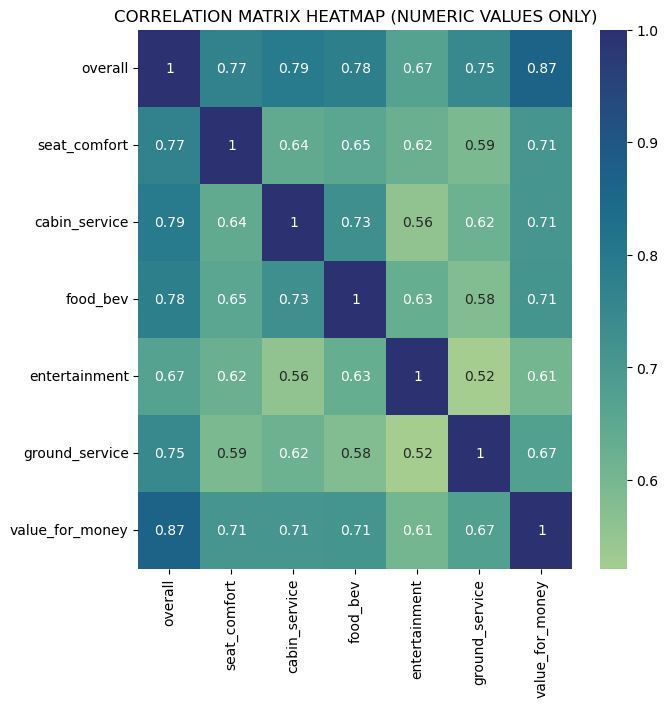

In [92]:
numeric_df=airline_df.select_dtypes(include=['number']) 
corr_mat=numeric_df.corr() 
plt.figure(figsize=(7,7))
sns.heatmap(corr_mat,annot=True,cmap="crest")
plt.title("CORRELATION MATRIX HEATMAP (NUMERIC VALUES ONLY)")

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
##Removing Mutlicollinear features 
  
def calc_vif(X): 
    ##Calculate variational inflation factor 
    vif=pd.DataFrame() 
    vif["variables"]=X.columns 
    vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
     
    return(vif)

In [95]:
calc_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,17.217947
1,cabin_service,19.373113
2,food_bev,17.375449
3,entertainment,12.734030
4,ground_service,12.682746


In [96]:
airline_df.drop(['overall'],axis=1,inplace=True)

In [97]:
airline_df.drop(['airline'],axis=1,inplace=True)

In [98]:
airline_df.head()

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
15,Solo Leisure,Economy Class,3.0,3.0,2.0,3.0,1.0,2.0,no
17,Solo Leisure,Economy Class,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
29,Solo Leisure,Economy Class,1.0,3.0,2.0,2.0,1.0,1.0,no


In [99]:
airline_df.isna().count

<bound method DataFrame.count of         traveller_type  cabin  seat_comfort  cabin_service  food_bev  \
7                False  False         False          False     False   
15               False  False         False          False     False   
17               False  False         False          False     False   
19               False  False         False          False     False   
29               False  False         False          False     False   
...                ...    ...           ...            ...       ...   
131676           False  False         False          False     False   
131680           False  False         False          False     False   
131696           False  False         False          False     False   
131702           False  False         False          False     False   
131712           False  False         False          False     False   

        entertainment  ground_service  value_for_money  recommended  
7               False           

In [100]:
airline_df=airline_df.reset_index(drop=True)


Label Encoding

In [101]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [102]:
label_encoder_recommended=LabelEncoder() 
airline_df['recommended']=label_encoder_recommended.fit_transform(airline_df['recommended']) 
airline_df

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1
1,Solo Leisure,Economy Class,3.0,3.0,2.0,3.0,1.0,2.0,0
2,Solo Leisure,Economy Class,2.0,3.0,3.0,3.0,3.0,3.0,1
3,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0
4,Solo Leisure,Economy Class,1.0,3.0,2.0,2.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...
13184,Solo Leisure,Economy Class,2.0,4.0,2.0,1.0,4.0,5.0,1
13185,Couple Leisure,Economy Class,2.0,2.0,2.0,1.0,2.0,5.0,1
13186,Family Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0
13187,Couple Leisure,Economy Class,5.0,5.0,5.0,4.0,4.0,4.0,1


ONEHOT ENCODING

In [103]:
from sklearn.preprocessing import OneHotEncoder 
onehot_encoder_travellertype=OneHotEncoder() 
travellertype=onehot_encoder_travellertype.fit_transform(airline_df[['traveller_type']])  
travellertype_array = travellertype.toarray()
print(travellertype_array)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [104]:
onehot_encoder_travellertype.get_feature_names_out(['traveller_type'])

array(['traveller_type_Business', 'traveller_type_Couple Leisure',
       'traveller_type_Family Leisure', 'traveller_type_Solo Leisure'],
      dtype=object)

In [105]:
traveller_type_df=pd.DataFrame(travellertype_array,columns=onehot_encoder_travellertype.get_feature_names_out(['traveller_type']))
traveller_type_df

,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
13184,0.0,0.0,0.0,1.0
13185,0.0,1.0,0.0,0.0
13186,0.0,0.0,1.0,0.0
13187,0.0,1.0,0.0,0.0


In [106]:
airline_df=pd.concat([airline_df.drop('traveller_type',axis=1),traveller_type_df],axis=1)

In [107]:
onehot_encoder_cabin=OneHotEncoder() 
cabintype=onehot_encoder_cabin.fit_transform(airline_df[['cabin']])  
cabintype_array = cabintype.toarray()
print(cabintype_array)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [108]:
onehot_encoder_cabin.get_feature_names_out(['cabin'])

array(['cabin_Business Class', 'cabin_Economy Class', 'cabin_First Class',
       'cabin_Premium Economy'], dtype=object)

In [109]:
cabin_type_df=pd.DataFrame(cabintype_array,columns=onehot_encoder_cabin.get_feature_names_out(['cabin'])) 
cabin_type_df

,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
13184,0.0,1.0,0.0,0.0
13185,0.0,1.0,0.0,0.0
13186,0.0,1.0,0.0,0.0
13187,0.0,1.0,0.0,0.0


In [110]:
airline_df=pd.concat([airline_df.drop('cabin',axis=1),cabin_type_df],axis=1) 



In [111]:
airline_df

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
0,4.0,5.0,5.0,5.0,5.0,5.0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3.0,3.0,2.0,3.0,1.0,2.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2.0,3.0,3.0,3.0,3.0,3.0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,3.0,2.0,2.0,1.0,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13184,2.0,4.0,2.0,1.0,4.0,5.0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
13185,2.0,2.0,2.0,1.0,2.0,5.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13186,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
13187,5.0,5.0,5.0,4.0,4.0,4.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [112]:
from sklearn.model_selection import train_test_split 

##Target variable 
y=airline_df['recommended']  
##Features
X=airline_df.drop(columns='recommended') 
  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
 
print(X_train.shape) 
print(X_test.shape)


(10551, 14)
(2638, 14)


In [113]:
from sklearn.linear_model import LogisticRegression 
##Training the model 
log_model=LogisticRegression(max_iter=10000) 
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [114]:
##Prediction   
y_pred_log=log_model.predict(X_test)

In [115]:
##Training and Test Score 
print(log_model.score(X_train,y_train))
print(log_model.score(X_test,y_test))

0.9289166903611032
0.9347990902198635


In [116]:
##Logistic regression report  
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
report_lr=classification_report(y_test,y_pred_log) 
print(report_lr)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       876
           1       0.95      0.96      0.95      1762

    accuracy                           0.93      2638
   macro avg       0.93      0.92      0.93      2638
weighted avg       0.93      0.93      0.93      2638



<Axes: >

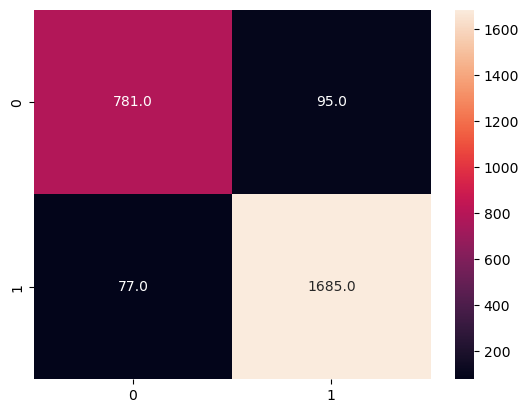

In [117]:
##Confusion matrix of logistic regression 
confusion_mat_lr=confusion_matrix(y_test,y_pred_log)  
  
##plot confusion matrix
sns.heatmap(confusion_mat_lr,annot=True,fmt='.1f')

In [118]:
##Cross validation  
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2','elasticnet','none']}  
cv=KFold(n_splits=5,random_state=None,shuffle=False)


In [119]:
##Hyper parameter tuning
clf_log_model=GridSearchCV(log_model,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [120]:
##Training data  
clf_log_model.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_macro')

In [121]:
##Prediction 
y_pred_clf_log_model=clf_log_model.predict(X_test) 


In [122]:
print(clf_log_model.score(X_train,y_train)) 
print(clf_log_model.score(X_test,y_test))

0.919639083747545
0.9265314977038345


In [123]:
##Best parameters after hyperparameter tuning 
 
print(clf_log_model.best_params_)

{'C': 10.0, 'penalty': 'l2'}


In [124]:
report_clf_lr=classification_report(y_test,y_pred_clf_log_model) 
print(report_clf_lr)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       876
           1       0.95      0.96      0.95      1762

    accuracy                           0.94      2638
   macro avg       0.93      0.92      0.93      2638
weighted avg       0.93      0.94      0.93      2638



<Axes: >

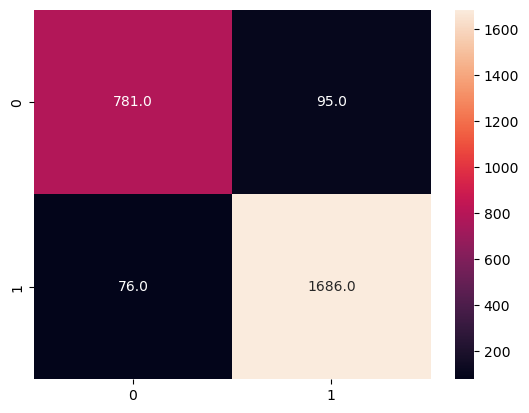

In [125]:
##Confusion matrix 
confusion_mat_clf_lr=confusion_matrix(y_test,y_pred_clf_log_model) 
 
sns.heatmap(confusion_mat_clf_lr,annot=True,fmt='0.1f')